# Dependencies

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

# Additional libraries
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt




# Pre-processing

From Alphabet Soup’s business team, you have received a CSV containing more than 34,000 organisations that have received funding from Alphabet Soup over the years. Within this dataset are a number of columns that capture metadata about each organisation, such as:

**Column Descriptions:**

- EIN: Employer Identification Number, a unique identifier for each organisation.
- NAME: Name of the organisation.
- APPLICATION_TYPE: Type of application submitted.
- AFFILIATION: Affiliation of the organisation.
- CLASSIFICATION: Classification of the organisation.
- USE_CASE: Use case for the funding.
- ORGANISATION: Type of organisation.
- STATUS: Active status of the organisation.
- INCOME_AMT: Income classification of the organisation.
- SPECIAL_CONSIDERATIONS: Indicates if special considerations apply.
- ASK_AMT: Amount of funding requested.
- IS_SUCCESSFUL: Target variable indicating if the funding was used successfully (1: Yes, 0: No).

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df_relevant = application_df.drop(columns=['EIN', 'NAME'])

application_df_relevant.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Additional - Check for missing values and data types
application_df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [4]:
# Additional - Get summary statistics
application_df_relevant.describe() 

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


In [5]:
# Determine the number of unique values in each column.
application_df_relevant.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df_relevant['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


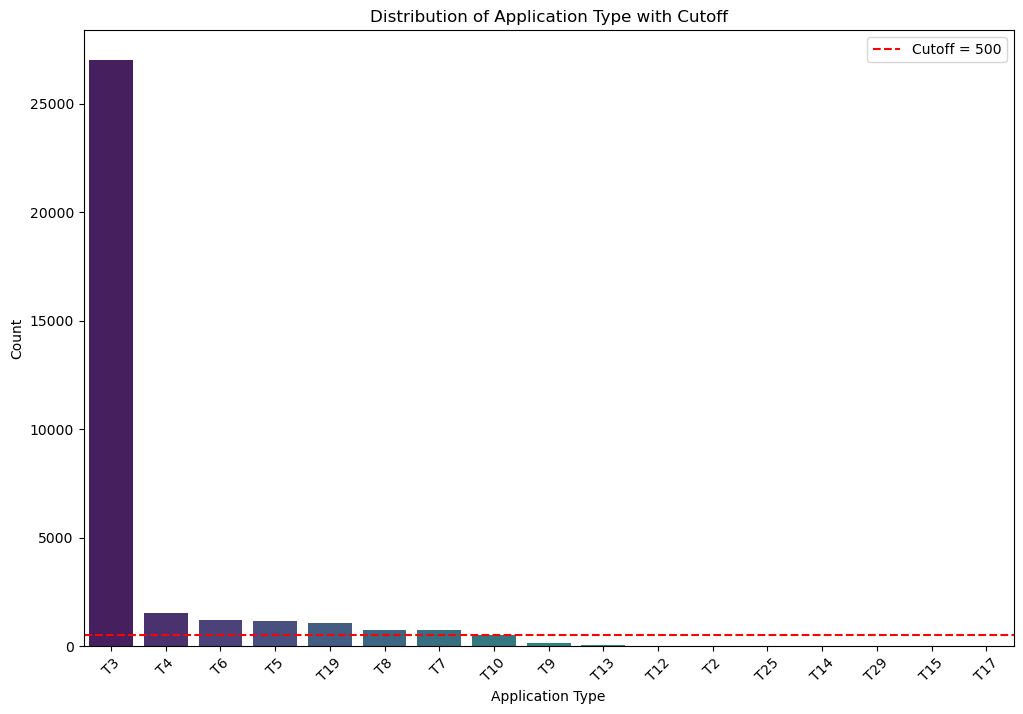

In [7]:
# Additional - # Visualisation to define the cutoff point

cutoff = int(input("Enter the cutoff value for APPLICATION_TYPE: "))

# Plot the distribution of APPLICATION_TYPE
plt.figure(figsize=(12, 8))
sns.barplot(x=application_type_counts.index, y=application_type_counts.values, palette='viridis')
plt.axhline(y=cutoff, color='r', linestyle='--', label=f'Cutoff = {cutoff}')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.title('Distribution of Application Type with Cutoff')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [8]:
# Choose a cutoff value and create a list of application types to be replaced - 500 selected using the plot above
cutoff = 500
application_types_to_replace = application_type_counts[application_type_counts < cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df_relevant['APPLICATION_TYPE'] = application_df_relevant['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure replacement was successful
print(application_df_relevant['APPLICATION_TYPE'].value_counts())

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


In [9]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_type_counts = application_df_relevant['CLASSIFICATION'].value_counts()
print(classification_type_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


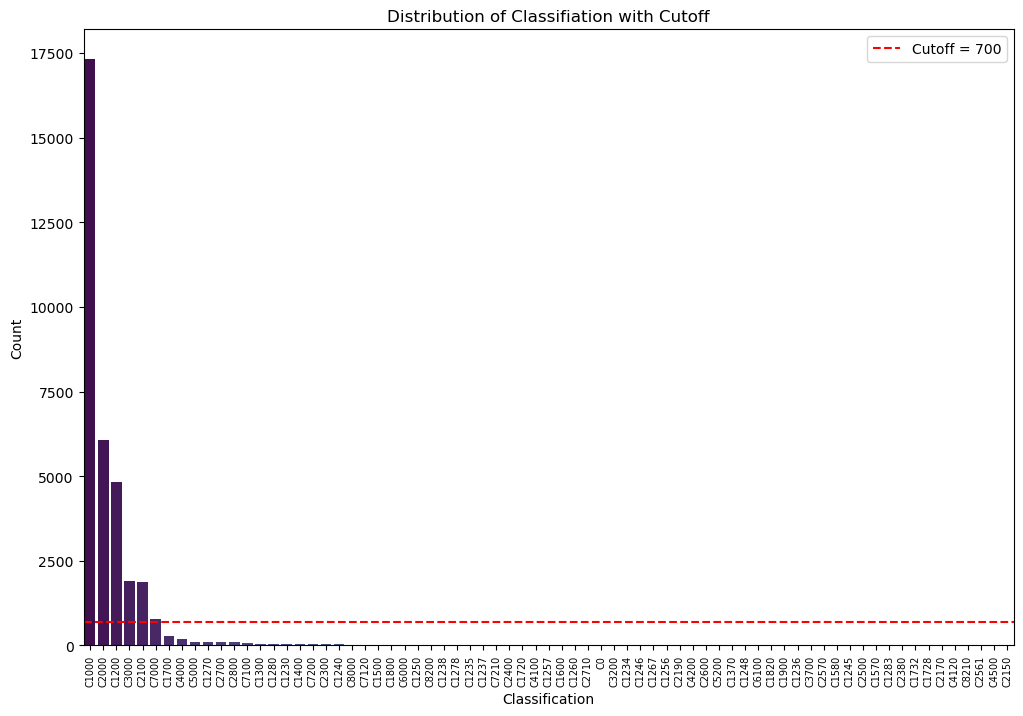

In [10]:
# Additional - # Visualisation to define the cutoff point

cutoff = int(input("Enter the cutoff value for CLASSIFICATION: ")) # Explore potential cutoff values

# Plot the distribution of APPLICATION_TYPE
plt.figure(figsize=(12, 8))
sns.barplot(x=classification_type_counts.index, y=classification_type_counts.values, palette='viridis')
plt.axhline(y=cutoff, color='r', linestyle='--', label=f'Cutoff = {cutoff}')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Distribution of Classifiation with Cutoff')
plt.xticks(rotation=90, fontsize=7)
plt.legend()
plt.show()

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 700
classifications_to_replace = classification_type_counts[classification_type_counts < cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df_relevant['CLASSIFICATION'] = application_df_relevant['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df_relevant['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: count, dtype: int64

### Additional - Preprocessing: Further Assessments and Feature Engineering

In [12]:
# Additional - One-hot encoding categorical variables

# One-hot encode the categorical variables
application_df_encoded = pd.get_dummies(application_df_relevant, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])

# Display the first few rows to confirm encoding
application_df_encoded.head()



,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [13]:
application_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34299 non-null  int64
 1   ASK_AMT                       34299 non-null  int64
 2   IS_SUCCESSFUL                 34299 non-null  int64
 3   APPLICATION_TYPE_Other        34299 non-null  bool 
 4   APPLICATION_TYPE_T10          34299 non-null  bool 
 5   APPLICATION_TYPE_T19          34299 non-null  bool 
 6   APPLICATION_TYPE_T3           34299 non-null  bool 
 7   APPLICATION_TYPE_T4           34299 non-null  bool 
 8   APPLICATION_TYPE_T5           34299 non-null  bool 
 9   APPLICATION_TYPE_T6           34299 non-null  bool 
 10  APPLICATION_TYPE_T7           34299 non-null  bool 
 11  APPLICATION_TYPE_T8           34299 non-null  bool 
 12  AFFILIATION_CompanySponsored  34299 non-null  bool 
 13  AFFILIATION_Family/Parent     3

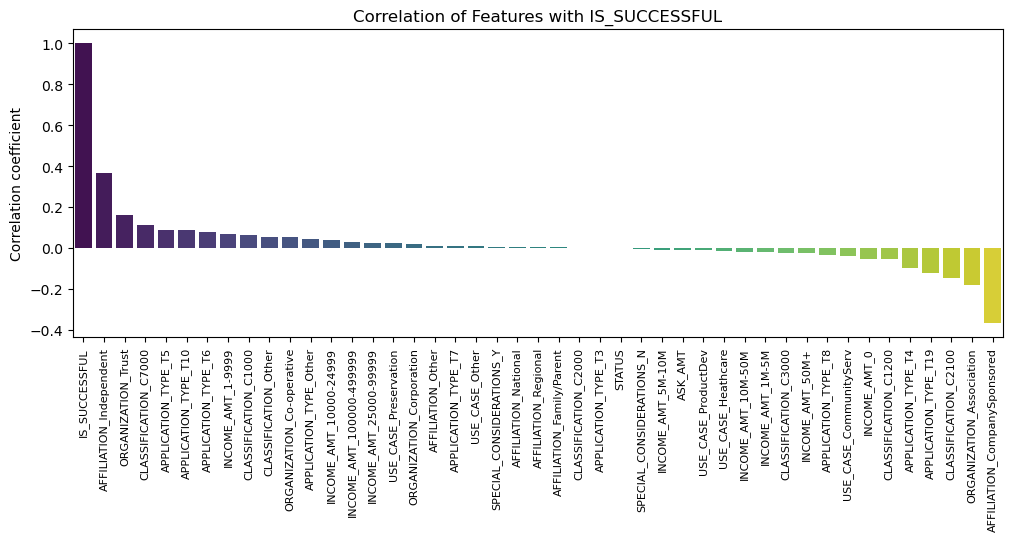

In [14]:
# Calculate correlation matrix
correlation_matrix = application_df_encoded.corr()

# Extract correlations with the target variable 'IS_SUCCESSFUL'
correlations_with_target = correlation_matrix['IS_SUCCESSFUL'].sort_values(ascending=False)

# Plot the correlations with the target variable
plt.figure(figsize=(12, 4))
sns.barplot(x=correlations_with_target.index, y=correlations_with_target.values, palette='viridis')
plt.xticks(rotation=90, fontsize=8)
plt.title('Correlation of Features with IS_SUCCESSFUL')
plt.ylabel('Correlation coefficient')
plt.show()

In [15]:
# Additional - Saving the correlations with the target variable to a CSV file
correlations_with_target.to_csv('correlations_with_target.csv')

In [16]:
# Additional - Selecting relevant features with correlation coefficient above a threshold

# Define a threshold for correlation coefficient
correlation_threshold = 0.05

# Identify features with absolute correlation above the threshold
important_features = correlations_with_target[abs(correlations_with_target) > correlation_threshold].index.tolist()

# Remove the target variable from the list of important features
important_features.remove('IS_SUCCESSFUL')

print(f"Selected features with correlation coefficient above {correlation_threshold}: {important_features}")

Selected features with correlation coefficient above 0.05: ['AFFILIATION_Independent', 'ORGANIZATION_Trust', 'CLASSIFICATION_C7000', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T6', 'INCOME_AMT_1-9999', 'CLASSIFICATION_C1000', 'CLASSIFICATION_Other', 'ORGANIZATION_Co-operative', 'INCOME_AMT_0', 'CLASSIFICATION_C1200', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T19', 'CLASSIFICATION_C2100', 'ORGANIZATION_Association', 'AFFILIATION_CompanySponsored']


In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE - done above before correlation matrix

In [18]:
# Split our preprocessed data into our features and target arrays
# Define the selected features
selected_features = important_features

# Create a dataframe with the selected features
X = application_df_encoded[selected_features]
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X.head()

,AFFILIATION_Independent,ORGANIZATION_Trust,CLASSIFICATION_C7000,APPLICATION_TYPE_T5,APPLICATION_TYPE_T10,APPLICATION_TYPE_T6,INCOME_AMT_1-9999,CLASSIFICATION_C1000,CLASSIFICATION_Other,ORGANIZATION_Co-operative,INCOME_AMT_0,CLASSIFICATION_C1200,APPLICATION_TYPE_T4,APPLICATION_TYPE_T19,CLASSIFICATION_C2100,ORGANIZATION_Association,AFFILIATION_CompanySponsored
0,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   AFFILIATION_Independent       34299 non-null  bool 
 1   ORGANIZATION_Trust            34299 non-null  bool 
 2   CLASSIFICATION_C7000          34299 non-null  bool 
 3   APPLICATION_TYPE_T5           34299 non-null  bool 
 4   APPLICATION_TYPE_T10          34299 non-null  bool 
 5   APPLICATION_TYPE_T6           34299 non-null  bool 
 6   INCOME_AMT_1-9999             34299 non-null  bool 
 7   CLASSIFICATION_C1000          34299 non-null  bool 
 8   CLASSIFICATION_Other          34299 non-null  bool 
 9   ORGANIZATION_Co-operative     34299 non-null  bool 
 10  INCOME_AMT_0                  34299 non-null  bool 
 11  CLASSIFICATION_C1200          34299 non-null  bool 
 12  APPLICATION_TYPE_T4           34299 non-null  bool 
 13  APPLICATION_TYPE_T19          3

In [21]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

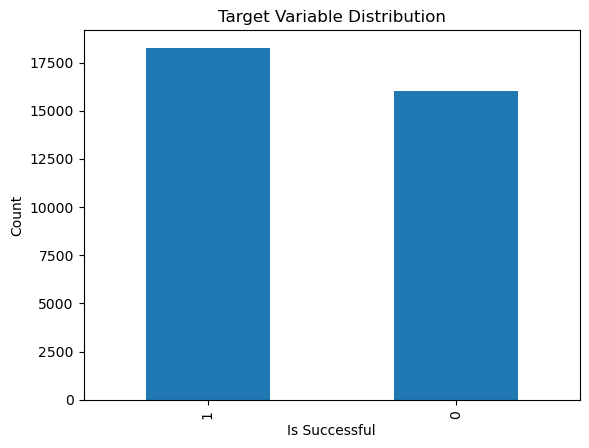

In [22]:
# Additional - Assess data imbalance (target variable)
y.value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Is Successful')
plt.ylabel('Count')
plt.show()

In [23]:
# I have removed features that have low correlation with the target variable, and no longer have numerical data. If I were to include numerical data, I would use a StandardScaler to normalise the data. This is the code:

# # Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

This is the first attempt at model development, but it's important to note that this is a very basic model and may not perform well.

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# Number of input features
input_dim = X.shape[1]

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=input_dim))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1440      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Train the model
history1 = nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5729 - accuracy: 0.7187 - val_loss: 0.5676 - val_accuracy: 0.7178
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5605 - accuracy: 0.7244 - val_loss: 0.5676 - val_accuracy: 0.7160
Epoch 3/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5588 - accuracy: 0.7242 - val_loss: 0.5644 - val_accuracy: 0.7178
Epoch 4/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5580 - accuracy: 0.7242 - val_loss: 0.5642 - val_accuracy: 0.7160
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5570 - accuracy: 0.7235 - val_loss: 0.5668 - val_accuracy: 0.7210
Epoch 6/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5570 - accuracy: 0.7247 - val_loss: 0.5637 - val_accuracy: 0.7203
Epoch 7/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5565 - accuracy: 0.7248 - val_loss: 0.5638 - val_accuracy: 0.7187

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5672 - accuracy: 0.7191 - 295ms/epoch - 1ms/step
Loss: 0.5672009587287903, Accuracy: 0.7190961837768555


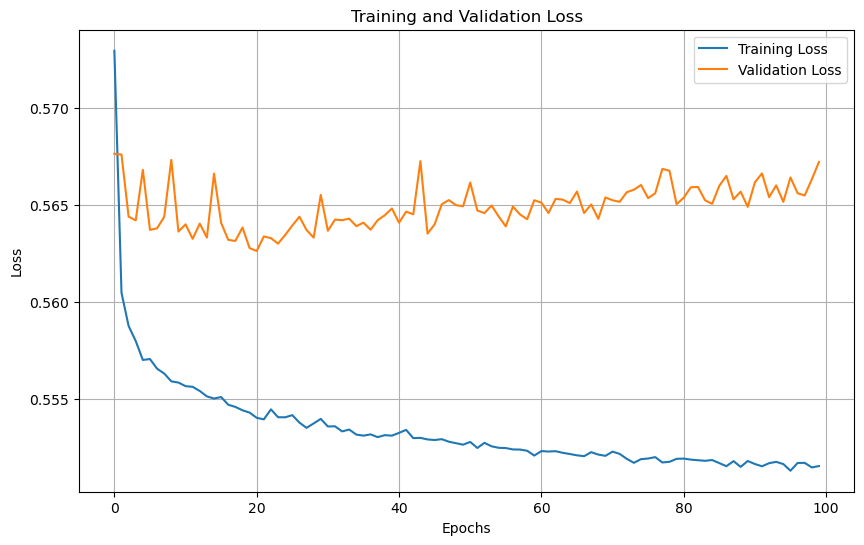

In [28]:
# Plotting the Model's Training and Validation Loss Over Epochs
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

The divergence between the training and validation loss shows that the model is overfitting the training data. This can be mitigated by using techniques like early stopping or reducing the learning rate, which will be done in `Automating Model Optimisation` section.

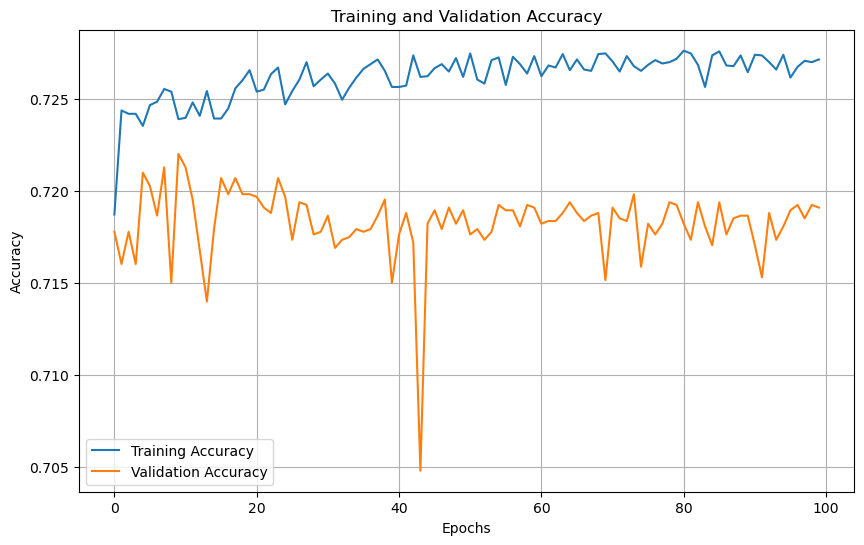

In [29]:
# Plotting the Model's Training and Validation Accuracy Over Epochs
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Automating Model Optimisation


In [30]:
# Create a method that creates a new Sequential model with hyperparameter options
# Note: This takes a long time to run due to the number of hyperparameter combinations tested (it has been commented out for that reason). For a more efficient approach, one can consider using a grid search or random search instead.

# ====================================================(uncomment this section if you would like to run the hyperparameter optimiser)

# def create_model(hp):
#     nn_model = tf.keras.models.Sequential()

#     # Allow Keras Tuner to decide which activation function to use in hidden layers
#     activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid', 'leaky_relu'])
    
#     # Allow Keras Tuner to decide the number of neurons in the first layer
#     nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
#         min_value=16,
#         max_value=128,
#         step=16), activation=activation, input_dim=X_train.shape[1]))

#     # Add additional hidden layers
#     for i in range(hp.Int('num_layers', 1, 4)):
#         nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
#             min_value=16,
#             max_value=128,
#             step=16),
#             activation=activation))
    
#     # Add a dropout layer for regularization if specified by Keras Tuner
#     if hp.Boolean("dropout"):
#         nn_model.add(tf.keras.layers.Dropout(rate=hp.Float("dropout_rate", min_value=0.1, max_value=0.5, step=0.1)))
    
#     # Output layer
#     nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#     # Compile the model
#     nn_model.compile(loss="binary_crossentropy", optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']), metrics=["accuracy"])
    
#     return nn_model

# # Initialize the Keras Tuner with the Hyperband algorithm
# tuner = kt.Hyperband(
#     create_model,
#     objective="val_accuracy",
#     max_epochs=50,
#     factor=3,
#     hyperband_iterations=3,
#     directory='my_dir',
#     project_name='hyperparameter_optimization'
# )

# # Run the Keras Tuner search for best hyperparameters
# tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)

# # Get the best hyperparameters
# best_hyper = tuner.get_best_hyperparameters(1)[0]
# print(best_hyper.values)

# # Get the best model based on the search
# best_model = tuner.get_best_models(1)[0]

# # Evaluate the best model against the test data
# model_loss, model_accuracy = best_model.evaluate(X_test, y_test, verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Evaluating the auto-optimised outputs

In [31]:
# Reloaded the tuner

# Re-define the create_model function as before
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow Keras Tuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid', 'leaky_relu'])
    
    # Allow Keras Tuner to decide the number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=16,
        max_value=128,
        step=16), activation=activation, input_dim=X_train.shape[1]))

    # Add additional hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=16,
            max_value=128,
            step=16),
            activation=activation))
    
    # Add a dropout layer for regularization if specified by Keras Tuner
    if hp.Boolean("dropout"):
        nn_model.add(tf.keras.layers.Dropout(rate=hp.Float("dropout_rate", min_value=0.1, max_value=0.5, step=0.1)))
    
    # Output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']), metrics=["accuracy"])
    
    return nn_model

# Reload the tuner without running the search again
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    factor=3,
    hyperband_iterations=3,
    directory='my_dir',
    project_name='hyperparameter_optimization'
)

# Load the existing results
tuner.reload()

# Now you can access the best hyperparameters and best model as before
best_hyper = tuner.get_best_hyperparameters(1)[0]
print(best_hyper.values)

# Get the best model based on the search
best_model = tuner.get_best_models(1)[0]

# Evaluate the best model against the test data
model_loss, model_accuracy = best_model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Reloading Tuner from my_dir\hyperparameter_optimization\tuner0.json
{'activation': 'tanh', 'first_units': 96, 'num_layers': 4, 'units_0': 96, 'dropout': True, 'optimizer': 'rmsprop', 'units_1': 112, 'dropout_rate': 0.1, 'units_2': 64, 'units_3': 96, 'tuner/epochs': 50, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
215/215 - 1s - loss: 0.5632 - accuracy: 0.7233 - 617ms/epoch - 3ms/step
Loss: 0.5631563067436218, Accuracy: 0.72332364320755


In [32]:
# Initialise variables to track the best trial
best_trial_key = None
best_val_accuracy = 0.0
best_hyperparameters = None

# Iterate through all trials in the oracle
for trial_key, trial in tuner.oracle.trials.items():
    # Get the validation accuracy for the current trial
    val_accuracy = trial.metrics.get_best_value('val_accuracy')
    
    # If this trial has the best validation accuracy so far, update the best_trial variables
    if val_accuracy and val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_hyperparameters = trial.hyperparameters.values
        best_trial_key = trial_key

# Print the best trial's information
print(f"Best Trial Key: {best_trial_key}")
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Validation Accuracy: {best_val_accuracy}")

Best Trial Key: 0179
Best Hyperparameters: {'activation': 'tanh', 'first_units': 96, 'num_layers': 4, 'units_0': 96, 'dropout': True, 'optimizer': 'rmsprop', 'units_1': 112, 'dropout_rate': 0.1, 'units_2': 64, 'units_3': 96, 'tuner/epochs': 50, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Best Validation Accuracy: 0.72332364320755


In [33]:
# Initialize an empty list to store the trial key and validation accuracy pairs
trial_accuracies = []

# Iterate through all trials in the oracle
for trial_key, trial in tuner.oracle.trials.items():
    # Get the validation accuracy for the current trial
    val_accuracy = trial.metrics.get_best_value('val_accuracy')
    
    # Store the trial key and its corresponding validation accuracy
    if val_accuracy is not None:
        trial_accuracies.append((trial_key, val_accuracy))

# Sort the list by trial keys (if you prefer sorting by accuracy, you can modify this)
trial_accuracies.sort(key=lambda x: x[0])

# Print the list of trial keys and their validation accuracies
for trial_key, val_accuracy in trial_accuracies:
    print(f"Trial {trial_key}: Validation Accuracy = {val_accuracy:.4f}")

plt.show()

Trial 0000: Validation Accuracy = 0.7138
Trial 0001: Validation Accuracy = 0.7176
Trial 0002: Validation Accuracy = 0.7182
Trial 0003: Validation Accuracy = 0.7162
Trial 0004: Validation Accuracy = 0.7182
Trial 0005: Validation Accuracy = 0.7197
Trial 0006: Validation Accuracy = 0.7207
Trial 0007: Validation Accuracy = 0.7093
Trial 0008: Validation Accuracy = 0.7172
Trial 0009: Validation Accuracy = 0.7171
Trial 0010: Validation Accuracy = 0.7175
Trial 0011: Validation Accuracy = 0.7198
Trial 0012: Validation Accuracy = 0.7223
Trial 0013: Validation Accuracy = 0.7201
Trial 0014: Validation Accuracy = 0.7182
Trial 0015: Validation Accuracy = 0.6816
Trial 0016: Validation Accuracy = 0.7175
Trial 0017: Validation Accuracy = 0.7118
Trial 0018: Validation Accuracy = 0.7133
Trial 0019: Validation Accuracy = 0.7179
Trial 0020: Validation Accuracy = 0.7173
Trial 0021: Validation Accuracy = 0.7207
Trial 0022: Validation Accuracy = 0.7188
Trial 0023: Validation Accuracy = 0.7181
Trial 0024: Vali

In [34]:
import plotly.graph_objs as go
from IPython.display import display
import pandas as pd

trial_accuracies = [
    (trial.trial_id, trial.metrics.get_best_value('val_accuracy')) 
    for trial in tuner.oracle.get_best_trials(num_trials=len(tuner.oracle.trials))
]

# Use the trial_accuracies list from the previous step
trial_keys = [trial_key for trial_key, _ in trial_accuracies]
val_accuracies = [val_accuracy for _, val_accuracy in trial_accuracies]

# Create a DataFrame for easy plotting
data = pd.DataFrame({
    'Trial Key': trial_keys,
    'Validation Accuracy': val_accuracies
})

# Find the best trial based on the highest validation accuracy
best_val_accuracy = max(val_accuracies)
best_trial_index = val_accuracies.index(best_val_accuracy)
best_trial_key = trial_keys[best_trial_index]

# Retrieve the best trial's hyperparameters
best_trial = tuner.oracle.trials[best_trial_key]
best_hyperparameters = best_trial.hyperparameters.values

# Create the plot
fig = go.Figure()

# Add the accuracy points
fig.add_trace(go.Scatter(
    x=data['Trial Key'],
    y=data['Validation Accuracy'],
    mode='markers+lines',
    marker=dict(color='blue', size=8),
    text=[f"Trial: {trial_key}<br>Accuracy: {val_accuracy:.4f}" for trial_key, val_accuracy in trial_accuracies],
    hoverinfo='text'
))

# Highlight the best trial
fig.add_trace(go.Scatter(
    x=[best_trial_key],
    y=[best_val_accuracy],
    mode='markers',
    marker=dict(color='red', size=12, symbol='circle'),
    text=[f"Best Trial: {best_trial_key}<br>Accuracy: {best_val_accuracy:.4f}"],
    hoverinfo='text',
    name='Best Trial'
))

# Update layout
fig.update_layout(
    title='Validation Accuracy Over Trials',
    xaxis_title='Trial Key',
    yaxis_title='Validation Accuracy',
    showlegend=False
)

# Display the plot
display(fig)

# Print the hyperparameters for the best trial
print("The hyperparameters for the best trial are:")
for key, value in best_hyperparameters.items():
    print(f"{key}: {value}")


The hyperparameters for the best trial are:
activation: tanh
first_units: 96
num_layers: 4
units_0: 96
dropout: True
optimizer: rmsprop
units_1: 112
dropout_rate: 0.1
units_2: 64
units_3: 96
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0


In [35]:
# Input the trial key
trial_key = input("Enter the trial number for a trial of interest (format XXXX): ")

# Function to retrieve and display hyperparameters, accuracy, and loss for a given trial key
def display_hyperparameters(trial_key):
    try:
        trial = tuner.oracle.trials[trial_key]
        hyperparameters = trial.hyperparameters.values
        val_accuracy = trial.metrics.get_best_value('val_accuracy')
        val_loss = trial.metrics.get_best_value('val_loss')
        
        print(f"Hyperparameters for Trial {trial_key}:")
        for key, value in hyperparameters.items():
            print(f"{key}: {value}")
        
        print(f"\nValidation Accuracy: {val_accuracy:.4f}")
        print(f"Validation Loss: {val_loss:.4f}")
    except KeyError:
        print(f"Trial {trial_key} does not exist. Please check the trial key and try again.")

# Call the function with the provided trial key
display_hyperparameters(trial_key)

# Print the hyperparameters for the best trial
print(f"=============================")
print("The hyperparameters for the best trial are:")
for key, value in best_hyperparameters.items():
    print(f"{key}: {value}")

# Additionally, print accuracy and loss for the best trial
best_val_accuracy = best_trial.metrics.get_best_value('val_accuracy')
best_val_loss = best_trial.metrics.get_best_value('val_loss')

print(f"\nBest Validation Accuracy: {best_val_accuracy:.4f}")
print(f"Best Validation Loss: {best_val_loss:.4f}")


Trial 500 does not exist. Please check the trial key and try again.
The hyperparameters for the best trial are:
activation: tanh
first_units: 96
num_layers: 4
units_0: 96
dropout: True
optimizer: rmsprop
units_1: 112
dropout_rate: 0.1
units_2: 64
units_3: 96
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0

Best Validation Accuracy: 0.7233
Best Validation Loss: 0.5632


c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



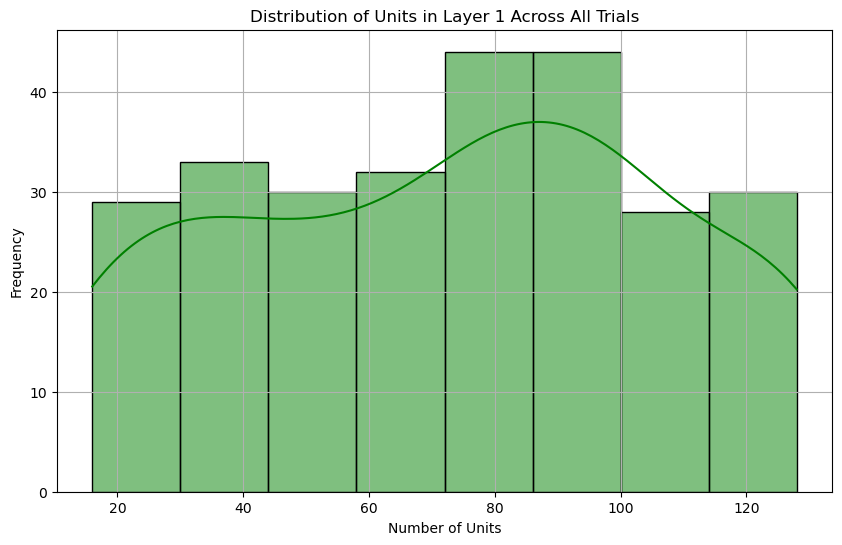

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



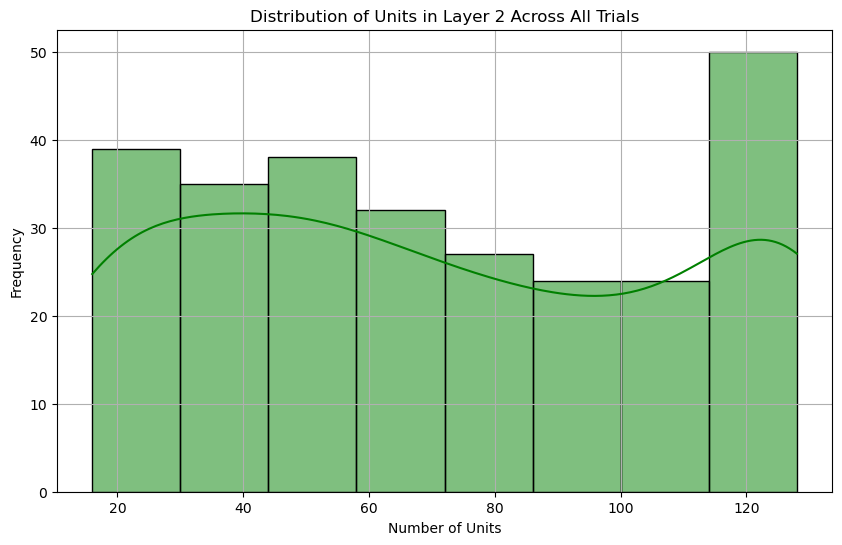

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



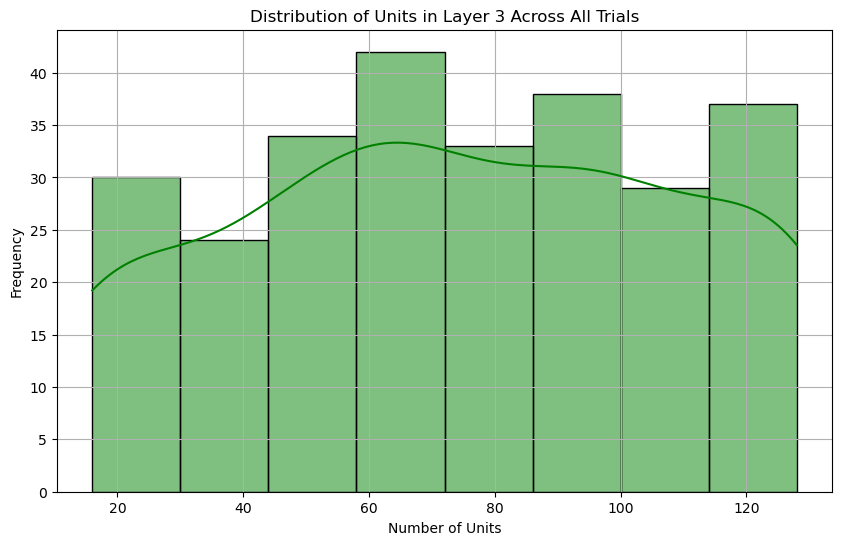

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



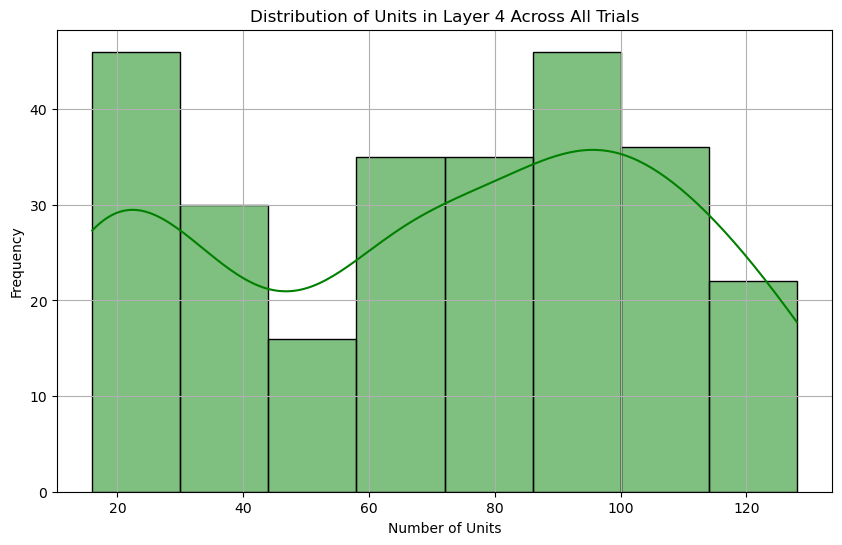

In [36]:
# Hyperparameter Importance

import seaborn as sns
import matplotlib.pyplot as plt

# Extract all completed trials from the tuner
tuner_results = tuner.oracle.get_best_trials(num_trials=len(tuner.oracle.trials))

# Define the number of layers you want to analyze
num_layers = 4

# Iterate over each layer
for i in range(num_layers):
    units_key = f'units_{i}'
    units_values = [trial.hyperparameters.values.get(units_key) for trial in tuner_results if units_key in trial.hyperparameters.values]

    if units_values:  # Check if there are any values to plot
        plt.figure(figsize=(10, 6))
        sns.histplot(units_values, kde=True, bins=8, color='green')
        plt.title(f'Distribution of Units in Layer {i+1} Across All Trials')
        plt.xlabel('Number of Units')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"No values found for {units_key}. Skipping this layer.")


In [37]:
import pandas as pd

# Extract relevant information for the top 10 trials
top_n = 10
top_trials = sorted(tuner.oracle.get_best_trials(num_trials=len(tuner.oracle.trials)), 
                    key=lambda x: x.metrics.get_best_value('val_accuracy'), 
                    reverse=True)[:top_n]

summary_data = []

for trial in top_trials:
    trial_info = {
        'Trial ID': trial.trial_id,
        'Validation Accuracy': trial.metrics.get_best_value('val_accuracy'),
        'Validation Loss': trial.metrics.get_best_value('val_loss'),
    }
    trial_info.update(trial.hyperparameters.values)
    summary_data.append(trial_info)

# Create a DataFrame to display the summary
summary_df = pd.DataFrame(summary_data)
display(summary_df)

,Trial ID,Validation Accuracy,Validation Loss,activation,first_units,num_layers,units_0,dropout,optimizer,units_1,dropout_rate,units_2,units_3,tuner/epochs,tuner/initial_epoch,tuner/bracket,tuner/round,tuner/trial_id
0,0179,0.723324,0.563156,tanh,96,4,96,True,rmsprop,112,0.1,64,96,50,0,0,0,NaN
1,0228,0.723178,0.567335,relu,64,3,32,False,adam,32,0.3,128,16,17,6,3,2,0221
2,0169,0.723032,0.563271,leaky_relu,64,4,32,True,adam,64,0.1,112,64,17,0,1,0,NaN
3,0046,0.722886,0.564155,relu,80,3,48,False,adam,128,0.2,96,32,17,6,3,2,0041
4,0167,0.722886,0.564707,tanh,112,3,96,True,adam,32,0.1,32,48,17,0,1,0,NaN
5,0095,0.722741,0.565093,leaky_relu,112,4,48,False,adam,64,0.1,112,96,2,0,3,0,NaN
6,0084,0.722595,0.563459,leaky_relu,96,4,16,True,adam,64,0.3,48,96,50,17,1,1,0075
7,0082,0.722595,0.571366,relu,80,3,112,False,rmsprop,128,0.2,48,16,50,17,1,1,0079
8,0265,0.722595,0.566541,relu,64,3,48,True,rmsprop,96,0.1,64,64,50,0,0,0,NaN
9,0146,0.722449,0.565145,relu,80,4,16,False,adam,112,0.2,32,96,6,0,2,0,NaN


In [38]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trial ID             10 non-null     object 
 1   Validation Accuracy  10 non-null     float64
 2   Validation Loss      10 non-null     float64
 3   activation           10 non-null     object 
 4   first_units          10 non-null     int64  
 5   num_layers           10 non-null     int64  
 6   units_0              10 non-null     int64  
 7   dropout              10 non-null     bool   
 8   optimizer            10 non-null     object 
 9   units_1              10 non-null     int64  
 10  dropout_rate         10 non-null     float64
 11  units_2              10 non-null     int64  
 12  units_3              10 non-null     int64  
 13  tuner/epochs         10 non-null     int64  
 14  tuner/initial_epoch  10 non-null     int64  
 15  tuner/bracket        10 non-null     int64 

In [39]:
summary_df.describe()

,Validation Accuracy,Validation Loss,first_units,num_layers,units_0,units_1,dropout_rate,units_2,units_3,tuner/epochs,tuner/initial_epoch,tuner/bracket,tuner/round
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,0.722828,0.565423,84.800000,3.500000,54.400000,83.200000,0.170000,73.600000,62.400000,27.60000,4.600000,1.500000,0.600000
std,0.000285,0.002498,18.552029,0.527046,34.728151,36.796135,0.082327,35.537773,33.263928,19.93991,6.979335,1.178511,0.843274
min,0.722449,0.563156,64.000000,3.000000,16.000000,32.000000,0.100000,32.000000,16.000000,2.00000,0.000000,0.000000,0.000000
25%,0.722595,0.563633,68.000000,3.000000,32.000000,64.000000,0.100000,48.000000,36.000000,17.00000,0.000000,1.000000,0.000000
50%,0.722813,0.564900,80.000000,3.500000,48.000000,80.000000,0.150000,64.000000,64.000000,17.00000,0.000000,1.000000,0.000000
75%,0.722996,0.566192,96.000000,4.000000,84.000000,112.000000,0.200000,108.000000,96.000000,50.00000,6.000000,2.750000,1.000000
max,0.723324,0.571366,112.000000,4.000000,112.000000,128.000000,0.300000,128.000000,96.000000,50.00000,17.000000,3.000000,2.000000


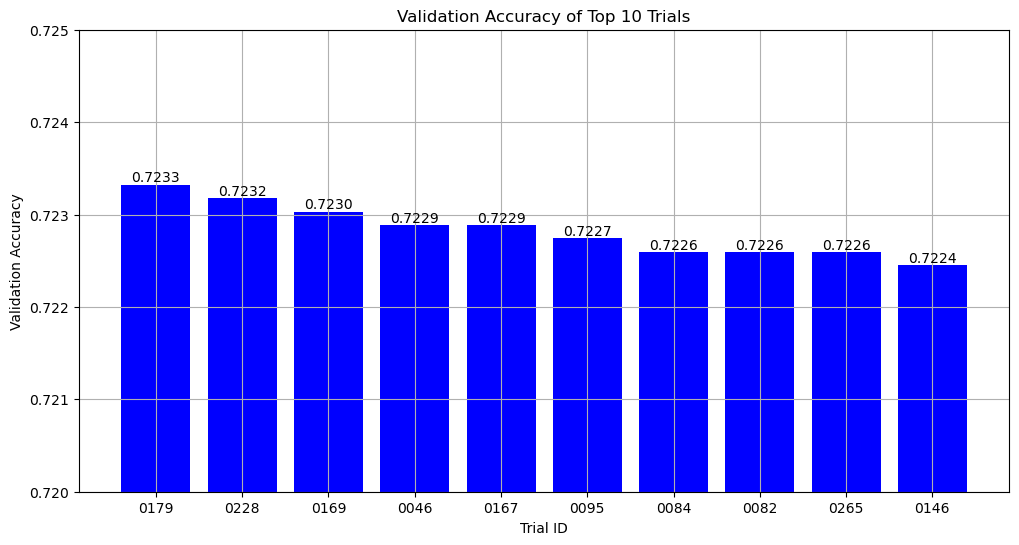

In [40]:
# Plot the validation accuracy of the top 10 trials
plt.figure(figsize=(12, 6))
bars = plt.bar(summary_df['Trial ID'], summary_df['Validation Accuracy'], color='blue')

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

plt.title('Validation Accuracy of Top 10 Trials')
plt.xlabel('Trial ID')
plt.ylabel('Validation Accuracy')
plt.ylim([0.72, 0.725])  # Adjust the y-axis limits based on your data range
plt.grid(True)
plt.show()

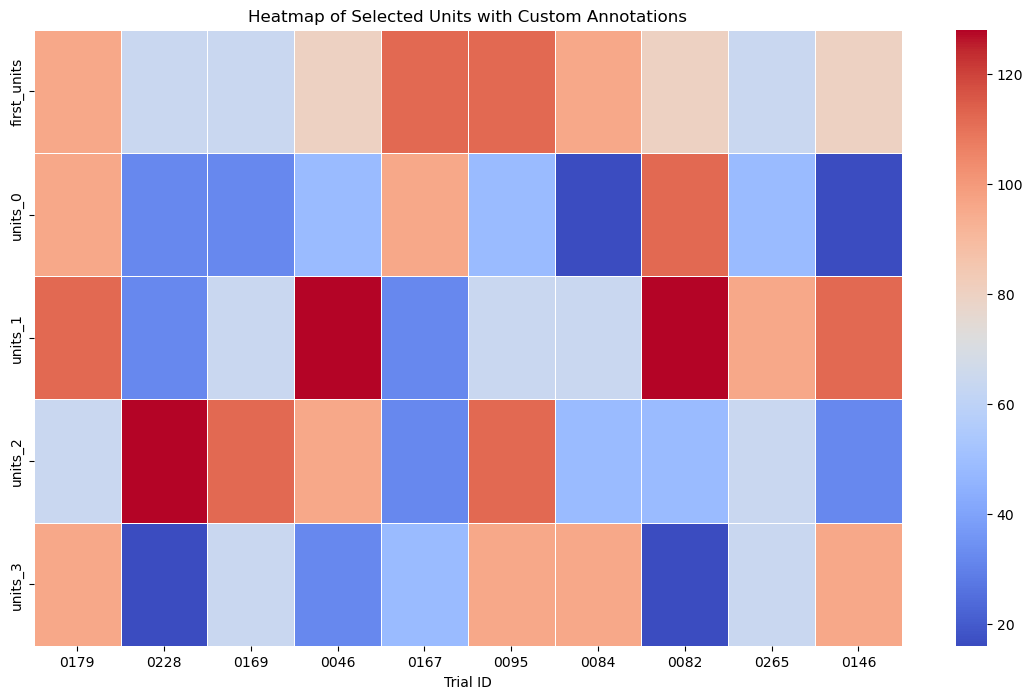

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame to only include the numeric columns for the heatmap
filtered_df = summary_df[['first_units', 'units_0', 'units_1', 'units_2', 'units_3']].copy()

# Set the Trial ID as the index for proper labeling in heatmap_df
filtered_df.set_index(summary_df['Trial ID'], inplace=True)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(filtered_df.T, fmt='', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Selected Units with Custom Annotations')
plt.show()


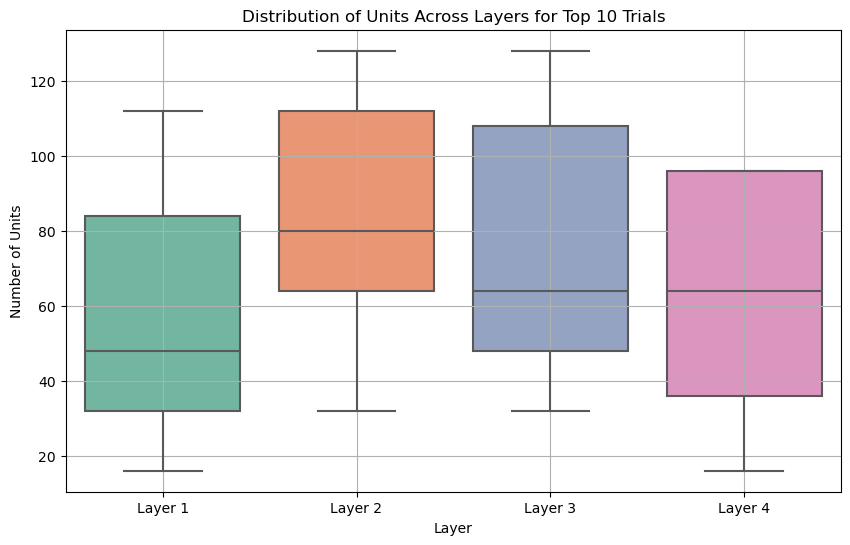

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of layers you want to analyze
num_layers = 4

# Collect data for all layers
layer_data = []

for i in range(num_layers):
    units_key = f'units_{i}'
    units_values = [trial.hyperparameters.values.get(units_key) for trial in top_trials if units_key in trial.hyperparameters.values]
    
    if units_values:
        layer_data.append(pd.DataFrame({
            'Layer': f'Layer {i+1}',
            'Units': units_values
        }))

# Combine data into a single DataFrame
combined_data = pd.concat(layer_data, ignore_index=True)

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Layer', y='Units', data=combined_data, palette='Set2')
plt.title(f'Distribution of Units Across Layers for Top {top_n} Trials')
plt.xlabel('Layer')
plt.ylabel('Number of Units')
plt.grid(True)
plt.show()

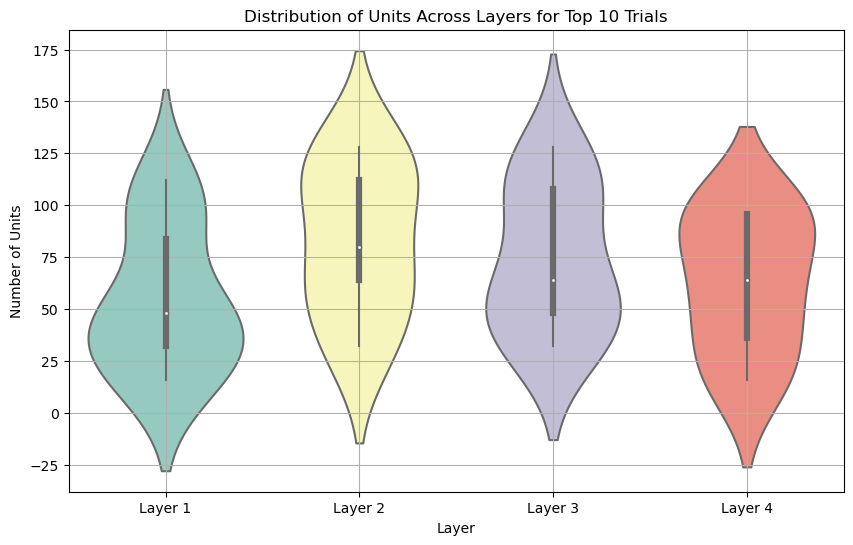

In [43]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Layer', y='Units', data=combined_data, palette='Set3')
plt.title(f'Distribution of Units Across Layers for Top {top_n} Trials')
plt.xlabel('Layer')
plt.ylabel('Number of Units')
plt.grid(True)
plt.show()

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



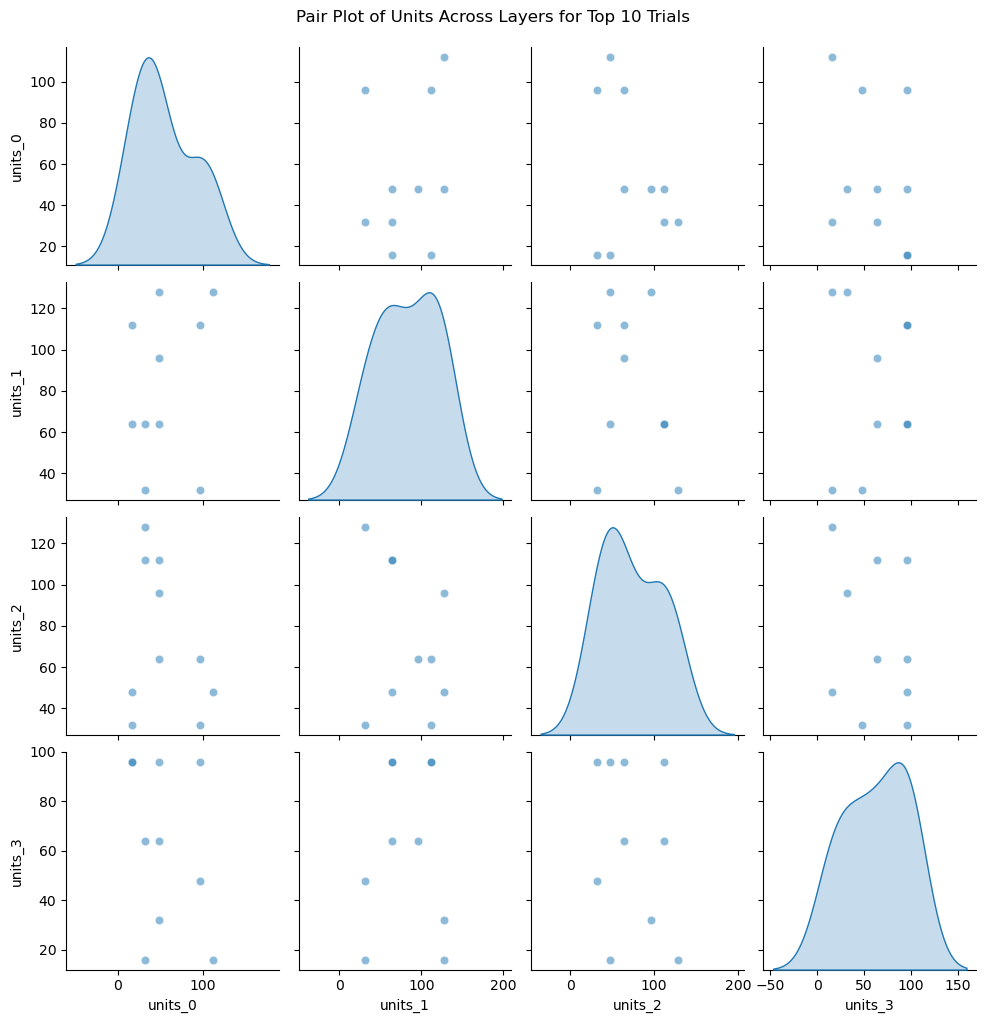

In [44]:
import seaborn as sns

# Collect hyperparameters of interest
hyperparam_data = {
    f'units_{i}': [trial.hyperparameters.values.get(f'units_{i}') for trial in top_trials] for i in range(num_layers)
}

# Create a DataFrame
hyperparam_df = pd.DataFrame(hyperparam_data)

# Plot pairwise relationships
sns.pairplot(hyperparam_df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle(f'Pair Plot of Units Across Layers for Top {top_n} Trials', y=1.02)
plt.show()

# Compile, Train and Evaluate the Optimised Neural Network

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the model - deep neural net with optimal hyperparameters
nn = tf.keras.models.Sequential()

# Number of input features
input_dim = X.shape[1]

# First hidden layer with 96 units and tanh activation
nn.add(tf.keras.layers.Dense(units=96, activation='tanh', input_dim=input_dim))

# Second hidden layer with 112 units and tanh activation
nn.add(tf.keras.layers.Dense(units=112, activation='tanh'))

# Third hidden layer with 64 units and tanh activation
nn.add(tf.keras.layers.Dense(units=64, activation='tanh'))

# Fourth hidden layer with 96 units and tanh activation
nn.add(tf.keras.layers.Dense(units=96, activation='tanh'))

# Dropout layer with a dropout rate of 0.1
nn.add(tf.keras.layers.Dropout(rate=0.1))

# Output layer with sigmoid activation
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

# Compile the model with the rmsprop optimizer
nn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = nn.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 96)                1728      
                                                                 
 dense_7 (Dense)             (None, 112)               10864     
                                                                 
 dense_8 (Dense)             (None, 64)                7232      
                                                                 
 dense_9 (Dense)             (None, 96)                6240      
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 97        
                                                                 
Total params: 26,161
Trainable params: 26,161
Non-trai

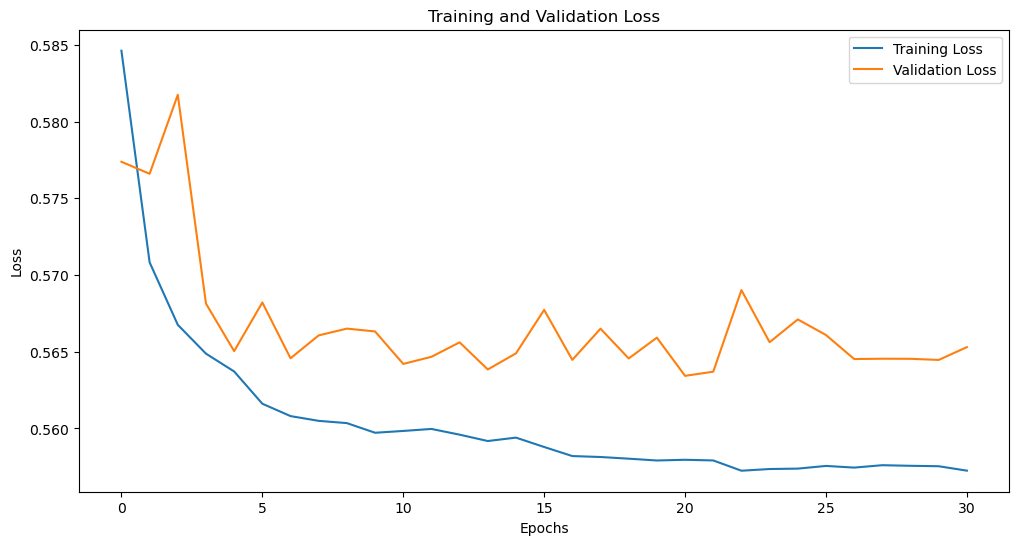

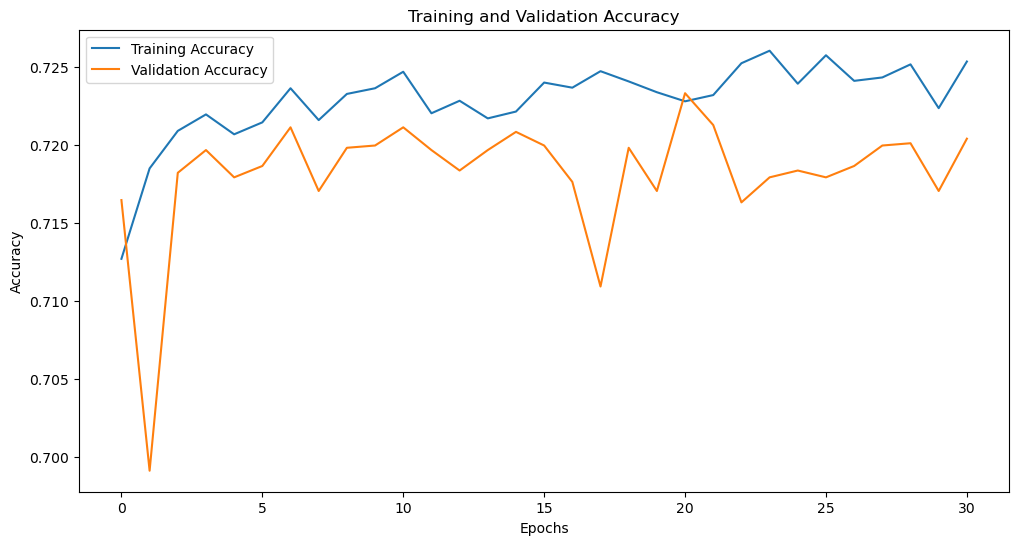

In [46]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Introduced early stopping to prevent overfitting and improve model performance.

The overall model achieved: Loss = 0.5640158653259277, Accuracy = 0.7189504504203796.

# Saving the Model

In [47]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimised.h5')
print("Model saved as AlphabetSoupCharity_Optimised.h5")

Model saved as AlphabetSoupCharity_Optimised.h5
